In [ ]:
import pandas as pd


# preparation of fertility data

fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)

fert.columns = fert.columns.astype(int)

fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

#preparation of population data

population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
population.index.name = 'country'
population = population.reset_index()
population = population.melt(id_vars='country', var_name='year', value_name='population')

# merging of fertility and population data

df = fert.merge(population)
life.index.name = 'country'
life = life.reset_index()

#life table melted to 3 columns

life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
df = df.merge(life)




In [ ]:
import pandas as pd

fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)

In [ ]:
print(fert.shape)

In [ ]:
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)

In [ ]:
print(life.shape)

In [ ]:
fert.columns

In [ ]:
life.columns

In [ ]:
fert.columns = fert.columns.astype(int)

In [ ]:
fert.columns

In [ ]:
fert.index

In [ ]:
fert.index.name

In [ ]:
fert.index.name = 'country'

In [ ]:
fert = fert.reset_index()

In [ ]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [ ]:
fert.head()

In [ ]:
population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)

In [ ]:
population.head()

In [ ]:
population.columns

In [ ]:
population.index.name = 'country'

In [ ]:
population = population.reset_index()

In [ ]:
population.head()

In [ ]:
population = population.melt(id_vars='country', var_name='year', value_name='population')

In [ ]:
population.head()

In [ ]:
df = fert.merge(population)

In [ ]:
life.head()

In [ ]:
life.index.name = 'country'

In [ ]:
life = life.reset_index()

In [ ]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [ ]:
life.head()

In [ ]:
df = df.merge(life)

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
            data=df_subset)

In [ ]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
            data=df_subset, alpha=0.6)

In [ ]:
df_subset[df_subset['year']==1960]

In [ ]:

for i in range(1960,2016):
    fig=plt.figure(1)
    fig.clf()    
    ax=plt.subplot(111)
    ax.set_xlim(1960,2016)
    ax.set_ylim(60,90)
    df_pic=df_subset[df_subset['year']==i]
    sns.scatterplot(x='year', y='life_expectancy', hue='country',
            data=df_pic, alpha=0.6,ax=ax)
    plt.savefig('../data/pics/lifeexp_{}.png'.format(i))


In [ ]:
pip install imageio

In [ ]:
import imageio

images = []
a=1960
b=2016

for i in range(a, b):
    filename = '../data/pics/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

In [ ]:
df.head()

In [ ]:
df['life_expectancy'].value_counts(dropna=False)

In [ ]:
df['population'].value_counts(dropna=False)

In [ ]:
df.info()

In [ ]:
df_clean=df.dropna()

In [ ]:
df_clean.info()

In [ ]:
continent = pd.read_csv('../data/continents.csv', sep=';')

In [ ]:
continent.head()

In [ ]:
df_clean.head()

In [ ]:
df_clean= df_clean.merge(continent)

In [ ]:
df_clean.head()

In [ ]:
df_clean.groupby('continent').count()

In [ ]:
df_clean[df_clean['country']=='Algeria']

In [ ]:
for i in range(1960,2016):
    fig=plt.figure(1)
    fig.clf()    
    ax=plt.subplot(111)
    ax.set_xlim(1960,2016)
    ax.set_ylim(0,10)
    df_pic=df_clean[df_clean['year']==i]
    sns.scatterplot(x='year', y='fertility_rate', hue='continent',
            data=df_pic,size='population', sizes=(50,200), alpha=0.6,ax=ax)
    plt.savefig('../data/pics/lifeexp_{}.png'.format(i))

In [ ]:
df_pic=df_clean[df_clean['year']==i]

In [ ]:
df_clean[df_clean['year']==2005]

In [ ]:
import imageio

images = []
a=1960
b=2016

for i in range(a, b):
    filename = '../data/pics/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

In [ ]:
child_mort = pd.read_csv('../data/child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col=0)

In [ ]:
child_mort.head()

In [ ]:
child_mort.index.name = 'country'
#child_mort = child_mort.reset_index()



In [ ]:
child_mort.columns

In [ ]:
child_mort.columns = child_mort.columns.astype(int)

In [ ]:
child_mort = child_mort.reset_index()

In [ ]:
child_mort.head()

In [ ]:
df_clean.head()

In [ ]:
child_mort = child_mort.melt(id_vars='country', var_name='year', value_name='child_mortality')

In [ ]:
df_clean= df_clean.merge(child_mort)

In [ ]:
'''for i in range(1960,2016):
    fig=plt.figure(1)
    fig.clf()    
    ax=plt.subplot(111)
    ax.set_xlim(1960,2016)
    ax.set_ylim(0,10)
    df_pic=df_clean[df_clean['year']==i]
    sns.scatterplot(x='child_mortality', y='fertility_rate', hue='continent',
            data=df_pic,size='population', sizes=(50,200), alpha=0.6,ax=ax)
    plt.savefig('pics/lifeexp_{}.png'.format(i))'''

In [ ]:
df_clean.columns

In [ ]:
df_clean['child_mortality'].describe()

In [ ]:
df_clean.head()

In [ ]:
df_clean[df_clean['country']=='Ghana']

In [ ]:
df_clean['child_mort_%']=df_clean['child_mortality'].transform(lambda x: 1- x/100)

In [ ]:
df_clean[df_clean['country']=='Ghana']

### The final necessities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [5]:
def prepare_fertility():
    '''   '''
    fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
    fert.index.name = 'country'
    fert.columns = fert.columns.astype(int)
    fert = fert.reset_index()
    fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
    return fert

In [6]:
def prepare_population():
    ''''''
    population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
    population.index.name = 'country'
    population = population.reset_index()
    population = population.melt(id_vars='country', var_name='year', value_name='population')
    return population

In [7]:
def prepare_life():
    ''''''
    life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
    life.index.name = 'country'
    life = life.reset_index()
    life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
    return life
    

In [ ]:
def prepare_mortality():
    ''''''
    child_mort = pd.read_csv('../data/child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col=0)
    child_mort.index.name = 'country'
    child_mort.columns = child_mort.columns.astype(int)
    child_mort = child_mort.reset_index()
    child_mort = child_mort.melt(id_vars='country', var_name='year', value_name='child_mortality')
    return child_mort

In [ ]:
 # main
    fert = prepare_fertility()
    population = prepare_population()
    
    df = fert.merge(population)
    prepare_life()
    df = df.merge(life)
    
    df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
    continent = pd.read_csv('../data/continents.csv', sep=';')
    df_clean=df.dropna()
    df_clean= df_clean.merge(continent)
    child_mort = prepare_mortality()
    df_clean= df_clean.merge(child_mort)

    df_clean['child_mort_%']=df_clean['child_mortality'].transform(lambda x: 1- x/100)

In [2]:
# preparation of fertility data

fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)
fert.index.name = 'country'
fert.columns = fert.columns.astype(int)
fert = fert.reset_index()
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

#preparation of population data

population = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
population.index.name = 'country'
population = population.reset_index()
population = population.melt(id_vars='country', var_name='year', value_name='population')

df = fert.merge(population)

# merging of fertility and population data

life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
life.index.name = 'country'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

df = df.merge(life)

df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]

continent = pd.read_csv('../data/continents.csv', sep=';')
df_clean=df.dropna()
df_clean= df_clean.merge(continent)

child_mort = pd.read_csv('../data/child_mortality_0_5_year_olds_dying_per_1000_born.csv', index_col=0)
child_mort.index.name = 'country'
child_mort.columns = child_mort.columns.astype(int)
child_mort = child_mort.reset_index()
child_mort = child_mort.melt(id_vars='country', var_name='year', value_name='child_mortality')
df_clean= df_clean.merge(child_mort)

df_clean['child_mort_%']=df_clean['child_mortality'].transform(lambda x: 1- x/100)


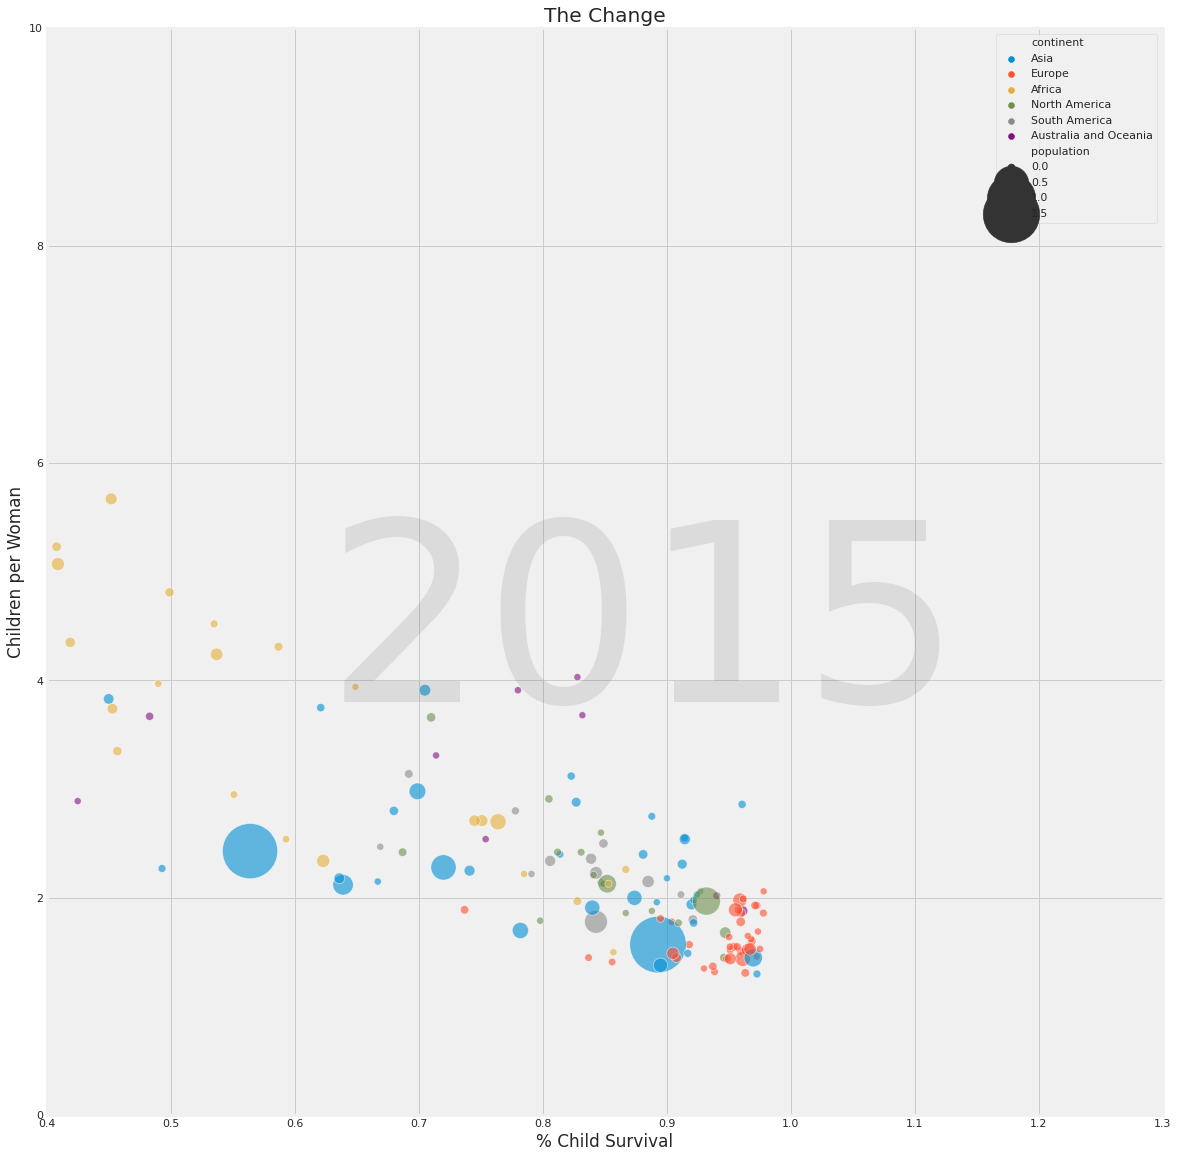

In [3]:
for i in range(1960,2016):
    fig=plt.figure(1)
    fig.clf()    
    ax=plt.subplot(111)
    ax.set_xlim(0.4,1.3)
    ax.set_ylim(0,10)
    df_pic=df_clean[df_clean['year']==i]
    plt.gcf().set_size_inches((20, 20))  
    sns.set_style('whitegrid')
    plt.title('The Change')
    plt.style.use('fivethirtyeight')
    sns.scatterplot(x='child_mort_%', y='fertility_rate', hue='continent',
            data=df_pic,size='population', sizes=(50,3200), alpha=0.6,ax=ax, legend='brief')
    plt.xlabel('% Child Survival')
    plt.ylabel('Children per Woman')
    ax.text(0.25,0.38,i,size=250,alpha=0.1,transform=ax.transAxes)
    plt.savefig('../data/pics/lifeexp_{}.png'.format(i))


In [4]:
import imageio

images = []
a=1960
b=2016

for i in range(a, b):
    filename = '../data/pics/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)